### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2, HA3 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use a cloud GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [1]:
nb_fname = "IHA2.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1, HA2 and HA3):

In [2]:
NAME1 = "Bingcheng Chen" 
NAME2 = ""
GROUP = ""

### Check Python version

In [3]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','9'), "You are not running Python 3.9. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [4]:
import os
nb_dirname = os.path.abspath('')
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Verify correct nb_fname

In [5]:
from IPython.display import display, HTML
try:
    display(HTML(r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(nb_fname=nb_fname)))
except NameError:
    assert False, 'Make sure to fill in the nb_fname variable above!'

### Verify that your notebook is up-to-date and not corrupted in any way

In [6]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/dml-cth/deep-machine-learning/master/home-assignments/IHA2/IHA2.ipynb
Missing cells: ['cell-2cfbecf57fd1043f']


AssertionError: [ERROR] Notebook does not seem to be up-to-date. Please follow these instructions to sync with latest GitHub version: https://github.com/dml-cth/deep-machine-learning/blob/master/instructions/YY_keep_git_repo_in_sync.md

# IHA2 - Catching Pokemon

![](http://tibetanitech.com/wp-content/uploads/2016/09/Pokemon-GO.jpg)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset in Computer Lab 1, but on a new and very interesting dataset. We'll use the [Predict'em All dataset from Kaggle](https://www.kaggle.com/semioniy/predictemall). You can download the dataset from Kaggle but you will need a Kaggle account. This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), with geographical coordinates, time, weather, population density, distance to pokestops/gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall)

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's latitude and longitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration


Feel free to add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to Canvas must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. However, **be sure that you do the assignment using PyTorch** since we will be using it through the following assignments as well. [The python docs](https://docs.python.org/3/), [pytorch docs](https://pytorch.org/docs/stable/index.html), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

**Hint:** Solving Computer Lab 1 (CL1) is a good way to get prepared for this assignment.

## 0. Imports

Import any necessary modules here.

In [ ]:
# YOUR CODE HERE
import pandas as pd
import numpy as np


## 1. Loading and extracting subset

The first step consists of filtering the dataset by the three pokemon you are interested at. 

Start by loading the `'300k.csv'` file using pandas. If you haven't downloaded it yet, use [this link](https://www.kaggle.com/semioniy/predictemall) to do so. 

In [ ]:
# YOUR CODE HERE
dataset = pd.read_csv('archive/300k.csv') 

/var/folders/06/gmp4cfpd1kn490jzvs864zh00000gn/T/ipykernel_17910/2871135763.py:2: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('archive/300k.csv')


Create a new `DataFrame` with only the columns `latitude`, `longitude`, and `class`.

In [ ]:
# YOUR CODE HERE
dataset_new = dataset[['latitude', 'longitude', 'class']]
print(dataset_new.shape)
print(len(dataset_new['class'].unique()))
dataset_new.head()


(296021, 3)
144


,latitude,longitude,class
0,20.525745,-97.460829,16
1,20.523695,-97.461167,133
2,38.903590,-77.199780,16
3,47.665903,-122.312561,13
4,47.666454,-122.311628,133


Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For convenience, use the following dictionary to convert between ids and names.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td><img src=https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png alt=Digglet></td>
    <td><img src=https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf></td>
    <td><img src=https://vignette2.wikia.nocookie.net/pokemon/images/0/01/128Tauros_AG_anime.png/revision/latest?cb=20140924030616></td>
  </tr>
</table>



In [ ]:
name_dict={1: 'Bulbasaur', 2: 'Ivysaur', 3: 'Venusaur', 4: 'Charmander', 5: 'Charmeleon', 6: 'Charizard', 7: 'Squirtle', 8: 
          'Wartortle', 9: 'Blastoise', 10: 'Caterpie', 11: 'Metapod', 12: 'Butterfree', 13: 'Weedle', 14: 'Kakuna', 
          15: 'Beedrill', 16: 'Pidgey', 17: 'Pidgeotto', 18: 'Pidgeot', 19: 'Rattata', 20: 'Raticate', 21: 'Spearow',
          22: 'Fearow', 23: 'Ekans', 24: 'Arbok', 25: 'Pikachu', 26: 'Raichu', 27: 'Sandshrew', 28: 'Sandslash', 
          29: 'Nidoran F', 30: 'Nidorina', 31: 'Nidoqueen',32: 'Nidoran M', 33: 'Nidorino', 34: 'Nidoking', 35: 'Clefairy',
          36: 'Clefable', 37: 'Vulpix', 38: 'Ninetales', 39: 'Jigglypuff', 40: 'Wigglytuff', 41: 'Zubat', 42: 'Golbat', 
          43: 'Oddish', 44: 'Gloom', 45: 'Vileplume', 46: 'Paras', 47: 'Parasect', 48: 'Venonat', 49: 'Venomoth',
          50: 'Diglett', 51: 'Dugtrio', 52: 'Meowth', 53: 'Persian', 54: 'Psyduck',55: 'Golduck', 56: 'Mankey', 
          57: 'Primeape', 58: 'Growlithe', 59: 'Arcanine', 60: 'Poliwag', 61: 'Poliwhirl', 62: 'Poliwrath',
          63: 'Abra', 64: 'Kadabra', 65: 'Alakazam', 66: 'Machop', 67: 'Machoke', 68: 'Machamp', 69: 'Bellsprout', 
          70: 'Weepinbell', 71: 'Victreebel', 72: 'Tentacool', 73: 'Tentacruel', 74: 'Geodude', 75: 'Graveler',
          76: 'Golem', 77: 'Ponyta', 78: 'Rapidash', 79: 'Slowpoke', 80: 'Slowbro', 81: 'Magnemite', 82: 'Magneton',
          83: "Farfetch'd", 84: 'Doduo', 85: 'Dodrio', 86: 'Seel', 87: 'Dewgong', 88: 'Grimer', 89: 'Muk', 
          90: 'Shellder', 91: 'Cloyster', 92: 'Gastly', 93: 'Haunter', 94: 'Gengar', 95: 'Onix', 96: 'Drowzee',
          97: 'Hypno', 98: 'Krabby', 99: 'Kingler', 100: 'Voltorb', 101: 'Electrode', 102: 'Exeggcute', 103: 'Exeggutor', 
          104: 'Cubone', 105: 'Marowak', 106: 'Hitmonlee', 107: 'Hitmonchan', 108: 'Lickitung', 109: 'Koffing',
          110: 'Weezing', 111: 'Rhyhorn', 112: 'Rhydon', 113: 'Chansey', 114: 'Tangela', 115: 'Kangaskhan', 116: 'Horsea', 
          117: 'Seadra', 118: 'Goldeen', 119: 'Seaking', 120: 'Staryu', 121: 'Starmie', 122: 'Mr. Mime', 123: 'Scyther', 
          124: 'Jynx', 125: 'Electabuzz', 126: 'Magmar', 127: 'Pinsir', 128: 'Tauros', 129: 'Magikarp', 130: 'Gyarados', 
          131: 'Lapras', 132: 'Ditto', 133: 'Eevee', 134: 'Vaporeon', 135: 'Jolteon', 136: 'Flareon', 137: 'Porygon', 
          138: 'Omanyte', 139: 'Omastar', 140: 'Kabuto', 141: 'Kabutops', 142: 'Aerodactyl', 143: 'Snorlax', 144: 'Articuno',
          145: 'Zapdos', 146: 'Moltres', 147: 'Dratini', 148: 'Dragonair', 149: 'Dragonite', 150: 'Mewtwo', 'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran F': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran M': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian': 53, 'Psyduck': 54, 'Golduck': 55, 'Mankey': 56, 'Primeape': 57, 'Growlithe': 58, 'Arcanine': 59, 'Poliwag': 60, 'Poliwhirl': 61, 'Poliwrath': 62, 'Abra': 63, 'Kadabra': 64, 'Alakazam': 65, 'Machop': 66, 'Machoke': 67, 'Machamp': 68, 'Bellsprout': 69, 'Weepinbell': 70, 'Victreebel': 71, 'Tentacool': 72, 'Tentacruel': 73, 'Geodude': 74, 'Graveler': 75, 'Golem': 76, 'Ponyta': 77, 'Rapidash': 78, 'Slowpoke': 79, 'Slowbro': 80, 'Magnemite': 81, 'Magneton': 82, 'Farfetch\'d': 83, 'Doduo': 84, 'Dodrio': 85, 'Seel': 86, 'Dewgong': 87, 'Grimer': 88, 'Muk': 89, 'Shellder': 90, 'Cloyster': 91, 'Gastly': 92, 'Haunter': 93, 'Gengar': 94, 'Onix': 95, 'Drowzee': 96, 'Hypno': 97, 'Krabby': 98, 'Kingler': 99, 'Voltorb': 100, 'Electrode': 101, 'Exeggcute': 102, 'Exeggutor': 103, 'Cubone': 104, 'Marowak': 105, 'Hitmonlee': 106, 'Hitmonchan': 107, 'Lickitung': 108, 'Koffing': 109, 'Weezing': 110, 'Rhyhorn': 111, 'Rhydon': 112, 'Chansey': 113, 'Tangela': 114, 'Kangaskhan': 115, 'Horsea': 116, 'Seadra': 117, 'Goldeen': 118, 'Seaking': 119, 'Staryu': 120, 'Starmie': 121, 'Mr. Mime': 122, 'Scyther': 123, 'Jynx': 124, 'Electabuzz': 125, 'Magmar': 126, 'Pinsir': 127, 'Tauros': 128, 'Magikarp': 129, 'Gyarados': 130, 'Lapras': 131, 'Ditto': 132, 'Eevee': 133, 'Vaporeon': 134, 'Jolteon': 135, 'Flareon': 136, 'Porygon': 137, 'Omanyte': 138, 'Omastar': 139, 'Kabuto': 140, 'Kabutops': 141, 'Aerodactyl': 142, 'Snorlax': 143, 'Articuno': 144, 'Zapdos': 145, 'Moltres': 146, 'Dratini': 147, 'Dragonair': 148, 'Dragonite': 149, 'Mewtwo': 150}

In [ ]:
# example usage (you can index either by name or id)
print(name_dict['Gengar'])
print(name_dict[94])

94
Gengar


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td><img src=https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png alt=Digglet></td>
    <td><img src=https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf></td>
    <td><img src=https://vignette2.wikia.nocookie.net/pokemon/images/0/01/128Tauros_AG_anime.png/revision/latest?cb=20140924030616></td>
  </tr>
</table>



Filter the dataset to contain only these pokemon.

In [ ]:
# YOUR CODE HERE
pokemon_interested = ['Diglett', 'Seel', 'Tauros']

# convert the name to numerical id
class_interested = np.array([name_dict[key] for key in pokemon_interested])
print(class_interested)

# filter the pokemon interested
df = dataset_new[dataset_new['class'].isin(class_interested)]
df

[ 50  86 128]


,latitude,longitude,class
90,49.146199,-122.638105,50
137,44.476769,-73.212749,128
225,39.767486,-86.161068,128
550,49.999197,9.066973,86
629,25.724382,-100.379311,50
...,...,...,...
294822,34.190725,-118.490821,128
294909,34.189895,-118.490000,86
295194,53.555035,-0.087039,86
295436,34.186898,-118.488905,86


## 2. Visualization of the dataset

The second step consists of visualizing the dataset. This will help you understand the distribution of the features and get an idea of how hard the task will be.

Plot a bar chart of the number of occurrences of each class.

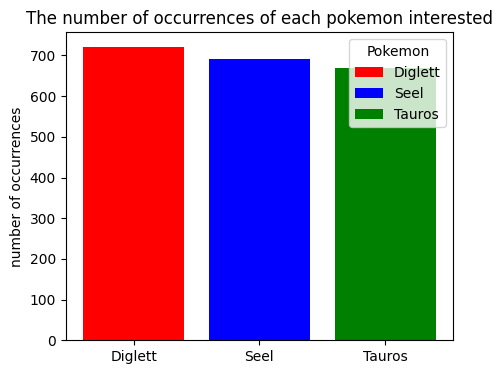

In [ ]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (5,4))

counts = df['class'].value_counts()
bar_colors = ['r', 'b', 'g']

ax.bar(pokemon_interested, counts, label=pokemon_interested, color=bar_colors)

ax.set_ylabel('number of occurrences')
ax.set_title('The number of occurrences of each pokemon interested')
ax.legend(title='Pokemon')

plt.show()

Is the dataset balanced?

**Your answer:** The number of occurrences of each class of pokemon are close in the figure above, thus the dataset is balanced.

Plot a scatter plot where the first dimension is latitude, the second is longitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

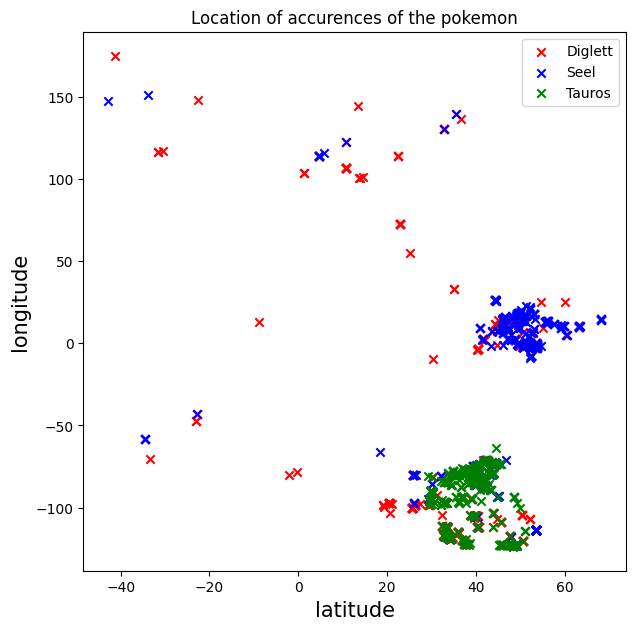

In [ ]:
# YOUR CODE HERE
fig, ax = plt.subplots(figsize = (7,7), dpi = 100)

df_diglett = df[df['class'] == 50]
df_Seel = df[df['class'] == 86]
df_Tauros = df[df['class'] == 128]

plt.scatter(df_diglett['latitude'], df_diglett['longitude'], marker='x', c='r', label = 'Diglett')
plt.scatter(df_Seel['latitude'], df_Seel['longitude'], marker='x', c='b', label = 'Seel')
plt.scatter(df_Tauros['latitude'], df_Tauros['longitude'], marker='x', c='g', label = 'Tauros')

ax.set_xlabel('latitude', fontsize = 15)
ax.set_ylabel('longitude', fontsize = 15)
ax.set_title('Location of accurences of the pokemon')
ax.legend()


Is there any other visualization you think would be useful? If so, insert it here.

**Your answer:** no

How hard do you think the problem is? Which classes can/cannot be easily separated?


**Your answer:** (fill in here)

Which accuracy do you expect to achieve?

**Your answer:** (fill in here)

## 3. Preprocessing

The third step consists of processing the data before training, such as dividing the dataset into training, validation, and test sets. Some tranformations can also be applied to the dataset in order to improve the performance of the network. 

Start by creating the input and output vectors.

In [ ]:
# YOUR CODE HERE
x = df[['latitude', 'longitude']].values
print(x.shape)


def encode_class(numerical_id):
    if numerical_id == class_interested[0]:
        return 0
    if numerical_id == class_interested[1]:
        return 1
    if numerical_id == class_interested[2]:
        return 2
    else:
        raise ValueError('class \'{}\' is not recognized.'.format(numerical_id))

temp = map(encode_class, df['class'].values)
y = np.array(list(temp))
print(y.shape)


(2083, 2)
(2083,)


Separate your data into training (55%), validation (25%) and test sets (20%). If you wish to apply any transformation to the dataset, do it here as well. 

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split

training_ratio = 0.55
validation_ratio = 0.25
test_ratio = 0.2

# (x_train, y_train) here consist training set and validation set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, random_state=42)

# convert numpy array to tensor
torch_x = torch.tensor(x_train, dtype=torch.float32)
torch_y = torch.tensor(y_train, dtype=torch.int64)

# create data loaders using `TensorDataset`and `DataLoader`, split the training and validation set
t_dataset = TensorDataset(torch_x, torch_y)

train_size = int((training_ratio / (training_ratio + validation_ratio)) * len(t_dataset))
val_size = len(t_dataset) - train_size
train_t_dataset, val_t_dataset = random_split(t_dataset, [train_size, val_size])

train_t_data_loader = DataLoader(train_t_dataset, batch_size=64, shuffle=True)
val_t_data_loader = DataLoader(val_t_dataset, batch_size=64)

/opt/homebrew/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 4. Training

The fourth step is where you will choose the architecture of your network (number of hidden layers, activation functions, etc.), and train it. 

Start by choosing an architecture for your network.

In [ ]:
# YOUR CODE HERE
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 3),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=128, bias=True)
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=3, bias=True)
  )
)


Train the network.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # forward prop and backprop using train_t_data_loader
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def validation(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Validation Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_t_data_loader, model, loss_fn, optimizer)
    validation(val_t_data_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.155271  [   64/ 1145]
Test Error: 
 Accuracy: 65.8%, Avg loss: 0.876890 

Epoch 2
-------------------------------
loss: 0.704095  [   64/ 1145]
Test Error: 
 Accuracy: 70.2%, Avg loss: 0.754573 

Epoch 3
-------------------------------
loss: 0.744997  [   64/ 1145]
Test Error: 
 Accuracy: 70.8%, Avg loss: 0.715122 

Epoch 4
-------------------------------
loss: 0.694336  [   64/ 1145]
Test Error: 
 Accuracy: 70.4%, Avg loss: 0.723085 

Epoch 5
-------------------------------
loss: 0.734180  [   64/ 1145]
Test Error: 
 Accuracy: 72.9%, Avg loss: 0.684621 

Epoch 6
-------------------------------
loss: 0.764849  [   64/ 1145]
Test Error: 
 Accuracy: 68.9%, Avg loss: 0.729796 

Epoch 7
-------------------------------
loss: 0.806340  [   64/ 1145]
Test Error: 
 Accuracy: 72.9%, Avg loss: 0.686544 

Epoch 8
-------------------------------
loss: 0.716666  [   64/ 1145]
Test Error: 
 Accuracy: 71.2%, Avg loss: 0.702643 

Epoch 9
----------------

In [ ]:
# # YOUR CODE HERE
# from torch import optim

# loss_fn = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# for epoch in range(20):

#     # forward prop and backprop using train_t_data_loader
#     losses = []
#     n_correct = 0
#     for b_x, b_y in train_t_data_loader:
#         pred = model(b_x)
#         loss = loss_fn(pred, b_y)
#         losses.append(loss.item())
        
#         hard_preds = pred.argmax(dim=1)
#         n_correct += (pred.argmax(dim=1) == b_y).sum().item()

#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()
#     train_accuracy = n_correct/len(train_t_dataset)
#     train_avg_loss = sum(losses)/len(losses)    

        
#     # Compute predictions in the validation set (with adagrad deactivated)
#     losses = []
#     n_correct = 0
#     with torch.no_grad():
#         for b_x, b_y in val_t_data_loader:
#             pred = model(b_x)
#             loss = loss_fn(pred, b_y)
#             losses.append(loss.item())
            
#             hard_preds = pred.argmax(dim=1)
#             n_correct += (pred.argmax(dim=1) == b_y).sum().item()
#         val_accuracy = n_correct/len(val_t_dataset)
#         val_avg_loss = sum(losses)/len(losses)      
        
        
#     display_str = 'Epoch {}'
#     display_str += '\tLoss: {:.3f} '
#     display_str += '\tLoss (val): {:.3f}'
#     display_str += '\tAccuracy: {:.2f}'
#     display_str += '\tAccuracy (val): {:.2f}'
#     print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))




Epoch 0	Loss: 0.829 	Loss (val): 0.740	Accuracy: 0.63	Accuracy (val): 0.73
Epoch 1	Loss: 0.740 	Loss (val): 0.718	Accuracy: 0.69	Accuracy (val): 0.72
Epoch 2	Loss: 0.714 	Loss (val): 0.722	Accuracy: 0.72	Accuracy (val): 0.71
Epoch 3	Loss: 0.732 	Loss (val): 0.709	Accuracy: 0.69	Accuracy (val): 0.74
Epoch 4	Loss: 0.711 	Loss (val): 0.711	Accuracy: 0.70	Accuracy (val): 0.73
Epoch 5	Loss: 0.706 	Loss (val): 0.692	Accuracy: 0.71	Accuracy (val): 0.74
Epoch 6	Loss: 0.700 	Loss (val): 0.702	Accuracy: 0.70	Accuracy (val): 0.72
Epoch 7	Loss: 0.715 	Loss (val): 0.695	Accuracy: 0.70	Accuracy (val): 0.73
Epoch 8	Loss: 0.707 	Loss (val): 0.691	Accuracy: 0.70	Accuracy (val): 0.74
Epoch 9	Loss: 0.704 	Loss (val): 0.698	Accuracy: 0.70	Accuracy (val): 0.73
Epoch 10	Loss: 0.687 	Loss (val): 0.688	Accuracy: 0.72	Accuracy (val): 0.73


Epoch 11	Loss: 0.689 	Loss (val): 0.680	Accuracy: 0.72	Accuracy (val): 0.74
Epoch 12	Loss: 0.690 	Loss (val): 0.684	Accuracy: 0.72	Accuracy (val): 0.72
Epoch 13	Loss: 0.683 	Loss (val): 0.684	Accuracy: 0.72	Accuracy (val): 0.75
Epoch 14	Loss: 0.687 	Loss (val): 0.688	Accuracy: 0.71	Accuracy (val): 0.73
Epoch 15	Loss: 0.692 	Loss (val): 0.674	Accuracy: 0.71	Accuracy (val): 0.73
Epoch 16	Loss: 0.691 	Loss (val): 0.681	Accuracy: 0.72	Accuracy (val): 0.73
Epoch 17	Loss: 0.691 	Loss (val): 0.683	Accuracy: 0.72	Accuracy (val): 0.73
Epoch 18	Loss: 0.681 	Loss (val): 0.680	Accuracy: 0.72	Accuracy (val): 0.74
Epoch 19	Loss: 0.690 	Loss (val): 0.677	Accuracy: 0.71	Accuracy (val): 0.73


For you to pass this assignment, you must obtain an accuracy on the validation set greater than 50%. It may be necessary to search for a good architecture by trying several different ones. If you want a challenge, try getting an accuracy greater than 63%.

## 5. Evaluation

Once you achieved at least 50% accuracy in the validation set, we are done with training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [ ]:
# YOUR CODE HERE
test_samples = torch.tensor(x_test, dtype=torch.float32)
test_labels = torch.tensor(y_test, dtype=torch.int64)

preds = model(test_samples).argmax(dim=1)

accuracy_test = (preds == test_labels).sum().item()/len(preds)
print("Accuracy on the test set: %.2f" % accuracy_test)

Accuracy on the test set: 0.73


Compute the confusion matrix of your predictions on the test set.

[[ 93  27  14]
 [ 10  96  40]
 [ 21   0 116]]


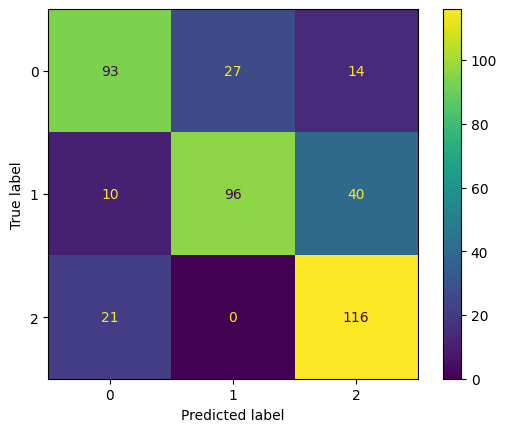

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_labels, preds)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

What can you conclude from the computed accuracy and confusion matrix?

**Your answer:** (fill in here)

Visualize the decision regions of the network. Overlap it with the points corresponding to the training data, such as in Section 2, by using the scatter plot function.

Hint: A simple way to do it is to generate a lot of points within a predefined range of longitude and latitude and apply your network to it. However, feel free to explore other ways.

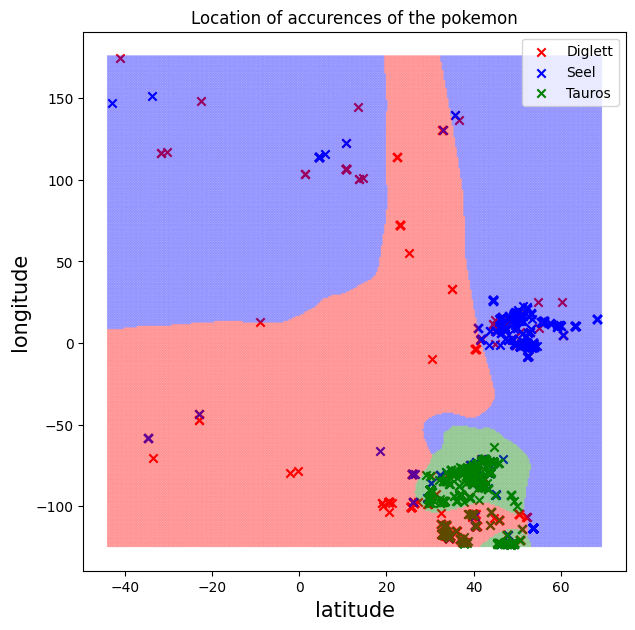

In [ ]:
# YOUR CODE HERE
latitude_min, latitude_max = df['latitude'].min() - 1, df['latitude'].max() + 1
longitude_min, longitude_max = df['longitude'].min() - 1, df['longitude'].max() + 1

num = 300

x_latitude, x_longitude = np.meshgrid(np.linspace(latitude_min, latitude_max, num = num),
                         np.linspace(longitude_min, longitude_max, num = num))

x_visual = np.concatenate((x_latitude.reshape(num*num,1), x_longitude.reshape(num*num,1)), axis=1)

x_visual_tensor = torch.tensor(x_visual, dtype=torch.float32)

y_visual_tensor = model(x_visual_tensor).argmax(dim=1)
y_visual = np.array(y_visual_tensor)


colors = np.where(y_visual== 0, 'r', 'b')
colors[y_visual == 2] = 'g' 
ax.scatter(x_visual[:,0], x_visual[:,1], c = colors, marker='.',s=1 ,alpha=0.2)
fig

Do the learned decision regions look like you would expect? Please comment on your results. 

**Your answer:** (fill in here)

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Your answer:** (fill in here)

Is (are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer:** (fill in here)

To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

In [ ]:
# YOUR CODE HERE

What does(do) this(ese) histogram(s) show you? Could it be beneficial to add this(ese) new feature(s) as input? Explain why/why not.

**Your answer:** (fill in here)

The purpose was this assignment was mostly to make you design a network for classification, using this Pokemon dataset as use case. However, if you want to find those three particular Pokemons, most likely using a network for classification is not the best approach. An alternative would be to perform localization by using regression instead. **Can you state some pros and cons of approach this as a regression problem instead of a classification problem?** (We do not except very detailed answers, you will pass the assignment as long as you make a reasonable attempt at explaining the pros and cons.)

**Your answer:** (fill in here)

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?

In [ ]:
# YOUR CODE HERE